In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import runtime
runtime.unassign()

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 55.1 MB/s eta 0:00:00


In [3]:
import os

# 验证数据集路径
train_dir = '/content/drive/MyDrive/organized_dataset/images/train'
val_dir = '/content/drive/MyDrive/organized_dataset/images/val'

# 检查训练和验证图像路径是否存在
if os.path.exists(train_dir) and os.path.exists(val_dir):
    print("训练和验证图像路径存在")
else:
    print("训练或验证图像路径不存在")

# 检查 YAML 文件路径
yaml_path = '/content/drive/MyDrive/organized_dataset/your_dataset.yaml'
if os.path.exists(yaml_path):
    print("YAML 文件路径存在")
else:
    print("YAML 文件路径不存在")

训练和验证图像路径存在
YAML 文件路径存在


In [4]:
# 定义YAML配置内容
data_yaml = """
train: /content/drive/MyDrive/organized_dataset/images/train
val: /content/drive/MyDrive/organized_dataset/images/val

nc: 3  # 类别数量
names:
  - Initial
  - Middle
  - Harvest  # 类别名称
"""

# 保存YAML文件到指定路径
yaml_path = '/content/drive/MyDrive/organized_dataset/your_dataset.yaml'
with open(yaml_path, 'w') as file:
    file.write(data_yaml)

print(f"YAML文件已创建并保存到: {yaml_path}")

YAML文件已创建并保存到: /content/drive/MyDrive/organized_dataset/your_dataset.yaml


In [5]:
#檢查YAML
with open('/content/drive/MyDrive/colabhw/dataset/organized_dataset/your_dataset.yaml', 'r') as file:
    yaml_content = file.read()
    print(yaml_content)


train: /content/drive/MyDrive/colabhw/dataset/organized_dataset/images/train
val: /content/drive/MyDrive/colabhw/dataset/organized_dataset/images/val

nc: 3  # 类别数量
names:
  - Initial
  - Middle
  - Harvest  # 类别名称



In [6]:
from ultralytics import YOLO

# 加载 YOLOv8 预训练模型
model = YOLO('yolov8n.pt')  # 可以选择不同的模型

# 开始训练
model.train(data='/content/drive/MyDrive/colabhw/dataset/organized_dataset/your_dataset.yaml',
            epochs=100,  # 训练的轮数
            imgsz=640,  # 输入图像大小
            batch=16,    # 批次大小
            name='yolov8-tomato',  # 保存模型的名称
            save=True)  # 确保训练结果被保存

100%|██████████| 6.25M/6.25M [00:00<00:00, 384MB/s]


Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/colabhw/dataset/organized_dataset/your_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8-tomato, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

100%|██████████| 755k/755k [00:00<00:00, 94.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/drive/.shortcut-targets-by-id/1ts4O7s6g1qhD0beDdYNoBCz2KYOctugJ/colabhw/dataset/organized_dataset/labels/train... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [05:41<00:00,  1.02it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1ts4O7s6g1qhD0beDdYNoBCz2KYOctugJ/colabhw/dataset/organized_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1ts4O7s6g1qhD0beDdYNoBCz2KYOctugJ/colabhw/dataset/organized_dataset/labels/val... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [01:37<00:00,  1.08it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1ts4O7s6g1qhD0beDdYNoBCz2KYOctugJ/colabhw/dataset/organized_dataset/labels/val.cache


Plotting labels to runs/detect/yolov8-tomato/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8-tomato
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.51G      3.526      4.091      2.725        253        640: 100%|██████████| 22/22 [00:56<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]

                   all        105       1125   0.000665    0.00533   0.000339   9.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.39G      2.949      3.206      2.065        147        640: 100%|██████████| 22/22 [00:55<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        105       1125      0.016      0.222     0.0122    0.00399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.61G      2.855      2.962      1.974        173        640: 100%|██████████| 22/22 [01:00<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        105       1125     0.0203      0.072     0.0101    0.00286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.51G      2.793      2.883      1.913        194        640: 100%|██████████| 22/22 [00:54<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        105       1125     0.0303     0.0996     0.0136    0.00453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.46G      2.829      2.871      1.984        121        640: 100%|██████████| 22/22 [00:55<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        105       1125     0.0186      0.056     0.0096    0.00284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.62G       2.73       2.79      1.923        221        640: 100%|██████████| 22/22 [00:55<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        105       1125     0.0114      0.184     0.0108    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.39G      2.701      2.778      1.953        168        640: 100%|██████████| 22/22 [00:55<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]


                   all        105       1125     0.0326     0.0889      0.014    0.00457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.29G      2.721      2.798      1.961        178        640: 100%|██████████| 22/22 [00:54<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        105       1125     0.0277      0.157      0.018    0.00708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.41G      2.678      2.719      1.924        205        640: 100%|██████████| 22/22 [00:57<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]


                   all        105       1125     0.0183      0.495     0.0276    0.00872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.44G      2.582      2.721      1.944        149        640: 100%|██████████| 22/22 [00:55<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        105       1125     0.0153      0.418     0.0219    0.00943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.53G      2.575      2.696      1.929        177        640: 100%|██████████| 22/22 [00:53<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        105       1125      0.018       0.33     0.0177    0.00602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.49G      2.596      2.697      1.918        154        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        105       1125     0.0181      0.373     0.0222    0.00723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G      2.533       2.67      1.889        173        640: 100%|██████████| 22/22 [00:52<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        105       1125     0.0933       0.15     0.0509     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G      2.553      2.605       1.88        161        640: 100%|██████████| 22/22 [00:52<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        105       1125     0.0926      0.125      0.043     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.52G      2.541      2.597       1.89        251        640: 100%|██████████| 22/22 [00:55<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        105       1125     0.0719      0.108       0.03     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.39G      2.509      2.638      1.883        155        640: 100%|██████████| 22/22 [00:55<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        105       1125      0.105     0.0587     0.0331     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.57G      2.524      2.611      1.887        222        640: 100%|██████████| 22/22 [00:57<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        105       1125      0.111     0.0924     0.0495     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.34G      2.467      2.618      1.842        132        640: 100%|██████████| 22/22 [00:53<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        105       1125      0.108      0.124     0.0421     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.42G      2.455      2.566      1.845        172        640: 100%|██████████| 22/22 [00:50<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        105       1125     0.0473     0.0827     0.0186    0.00589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.65G      2.461      2.575      1.872        159        640: 100%|██████████| 22/22 [00:50<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        105       1125      0.129     0.0862     0.0434     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.63G      2.435      2.542      1.839        229        640: 100%|██████████| 22/22 [00:51<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        105       1125      0.188      0.108      0.066     0.0216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.33G      2.472      2.556      1.846        133        640: 100%|██████████| 22/22 [00:50<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        105       1125      0.102      0.157     0.0498     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.52G      2.433      2.544      1.827        225        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        105       1125     0.0915      0.134     0.0442     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.46G       2.38      2.513      1.793        147        640: 100%|██████████| 22/22 [00:54<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        105       1125      0.128      0.124     0.0589     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.41G       2.37       2.48       1.79        206        640: 100%|██████████| 22/22 [00:56<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        105       1125      0.146      0.103     0.0582     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.46G      2.377      2.466      1.797        248        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        105       1125      0.132     0.0818     0.0435     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.51G      2.381      2.394      1.753        190        640: 100%|██████████| 22/22 [00:47<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        105       1125      0.163     0.0907     0.0529     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.35G      2.324      2.445       1.77        180        640: 100%|██████████| 22/22 [00:47<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        105       1125      0.113     0.0907     0.0469     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.5G      2.327      2.413      1.774        132        640: 100%|██████████| 22/22 [00:52<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        105       1125      0.193      0.106     0.0641     0.0211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.86G      2.385      2.426      1.773        211        640: 100%|██████████| 22/22 [00:55<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        105       1125      0.194      0.139     0.0895     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.62G      2.317      2.432      1.768        161        640: 100%|██████████| 22/22 [00:55<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


                   all        105       1125      0.176      0.116     0.0758     0.0238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.41G      2.302      2.385      1.744        150        640: 100%|██████████| 22/22 [00:56<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        105       1125      0.124      0.116      0.046     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.46G      2.303      2.355      1.736        182        640: 100%|██████████| 22/22 [00:54<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        105       1125      0.184      0.112     0.0646     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.55G      2.256      2.397      1.724        148        640: 100%|██████████| 22/22 [00:55<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        105       1125      0.179       0.14     0.0793     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.7G      2.283      2.386      1.757        174        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        105       1125      0.217      0.135     0.0803     0.0268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.4G      2.232      2.343      1.752        219        640: 100%|██████████| 22/22 [00:55<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]


                   all        105       1125      0.136      0.117     0.0591     0.0211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.52G      2.253       2.32      1.713        182        640: 100%|██████████| 22/22 [00:54<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        105       1125      0.208      0.124     0.0845     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.6G      2.226      2.299      1.708        190        640: 100%|██████████| 22/22 [00:53<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        105       1125       0.19      0.142     0.0867     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.51G      2.179       2.26       1.69        190        640: 100%|██████████| 22/22 [00:55<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        105       1125      0.198      0.164      0.101     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.5G      2.205      2.276      1.707        163        640: 100%|██████████| 22/22 [00:54<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        105       1125       0.22      0.148      0.107      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.68G      2.186      2.239      1.687        253        640: 100%|██████████| 22/22 [00:58<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        105       1125      0.228      0.149     0.0869     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.66G       2.16      2.215      1.696        161        640: 100%|██████████| 22/22 [00:59<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        105       1125      0.242      0.157      0.109      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.31G      2.141      2.228      1.673        107        640: 100%|██████████| 22/22 [00:56<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        105       1125      0.273      0.164      0.117     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.52G      2.133      2.213      1.673        219        640: 100%|██████████| 22/22 [00:57<00:00,  2.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        105       1125      0.229      0.169      0.107     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.54G      2.152      2.182      1.665        177        640: 100%|██████████| 22/22 [00:57<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        105       1125      0.173      0.139     0.0697       0.02



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.64G      2.124      2.155      1.659        200        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        105       1125      0.269      0.192      0.115     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.58G      2.126      2.178      1.667        178        640: 100%|██████████| 22/22 [00:54<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        105       1125      0.253      0.196      0.121     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.56G      2.093       2.11      1.648        239        640: 100%|██████████| 22/22 [00:56<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        105       1125      0.266      0.116     0.0874     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.55G      2.095      2.139      1.611        231        640: 100%|██████████| 22/22 [00:49<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        105       1125      0.295      0.175      0.129     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.4G        2.1      2.144      1.627        150        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        105       1125      0.317      0.176      0.134     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.63G      2.102      2.118      1.653        240        640: 100%|██████████| 22/22 [00:52<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        105       1125      0.257      0.183      0.122     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.52G      2.103      2.099      1.639        174        640: 100%|██████████| 22/22 [00:51<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        105       1125      0.273      0.198      0.138     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.68G      2.085      2.083      1.618        125        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        105       1125      0.244      0.205      0.136     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.51G      2.057      2.097      1.624        169        640: 100%|██████████| 22/22 [00:52<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        105       1125      0.249      0.188      0.129     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.48G      2.074      2.083      1.628        148        640: 100%|██████████| 22/22 [00:54<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        105       1125      0.283        0.2      0.156     0.0571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.67G      2.063       2.04      1.606        152        640: 100%|██████████| 22/22 [00:51<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        105       1125        0.3      0.217      0.161     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.61G      2.021      2.007      1.576        254        640: 100%|██████████| 22/22 [00:52<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


                   all        105       1125        0.3      0.224      0.162      0.063

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.58G          2      1.978      1.572        182        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        105       1125       0.31      0.222      0.164     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.63G      2.036      1.996      1.589        159        640: 100%|██████████| 22/22 [00:55<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        105       1125      0.303      0.215      0.144     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.45G      1.965      1.966       1.56        136        640: 100%|██████████| 22/22 [00:51<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        105       1125      0.303      0.176      0.134     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.67G      2.031      1.977      1.571        301        640: 100%|██████████| 22/22 [00:54<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        105       1125      0.245      0.209      0.119     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.43G      2.007      1.965      1.569        219        640: 100%|██████████| 22/22 [00:52<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        105       1125      0.346      0.198       0.15     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.32G      1.978      1.919      1.554        170        640: 100%|██████████| 22/22 [00:55<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


                   all        105       1125      0.315      0.186      0.144      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.64G      1.987      1.937      1.549        150        640: 100%|██████████| 22/22 [00:55<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        105       1125       0.29      0.164      0.122     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.5G      1.976      1.931       1.53        155        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        105       1125      0.288      0.196      0.148     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.41G      1.944       1.89      1.554        207        640: 100%|██████████| 22/22 [00:53<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        105       1125      0.224      0.208      0.112     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.4G      1.994      1.927      1.551        186        640: 100%|██████████| 22/22 [00:50<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        105       1125      0.303      0.212      0.145     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.62G      1.955      1.887      1.534        162        640: 100%|██████████| 22/22 [00:53<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        105       1125      0.353      0.227       0.18     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.43G          2      1.915      1.542        237        640: 100%|██████████| 22/22 [00:50<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        105       1125      0.241      0.198      0.118     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.46G      1.949      1.885      1.541        150        640: 100%|██████████| 22/22 [00:53<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        105       1125       0.29      0.196      0.145     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.35G      1.956      1.854      1.535        123        640: 100%|██████████| 22/22 [00:56<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        105       1125      0.277       0.19      0.132     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.42G      1.921      1.875      1.545        210        640: 100%|██████████| 22/22 [00:59<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        105       1125      0.264       0.22       0.13     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.63G      1.902       1.83      1.513        233        640: 100%|██████████| 22/22 [00:51<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        105       1125      0.297      0.221       0.16     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.54G      1.912      1.844      1.513        151        640: 100%|██████████| 22/22 [00:54<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        105       1125      0.274      0.173      0.121     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.42G      1.892      1.807      1.503        246        640: 100%|██████████| 22/22 [00:59<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        105       1125      0.311      0.185      0.138     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.53G      1.868      1.776      1.497        134        640: 100%|██████████| 22/22 [00:50<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        105       1125      0.287      0.203      0.151     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.48G      1.916      1.837      1.524        212        640: 100%|██████████| 22/22 [00:51<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        105       1125      0.283      0.215      0.152     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.62G      1.911      1.805      1.531        150        640: 100%|██████████| 22/22 [00:51<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        105       1125      0.313      0.205      0.162     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.58G      1.887      1.761      1.497        244        640: 100%|██████████| 22/22 [00:51<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        105       1125      0.282      0.198      0.143     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.36G      1.889      1.761      1.505        167        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        105       1125       0.27      0.206      0.139     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.48G      1.893       1.75      1.507        180        640: 100%|██████████| 22/22 [00:54<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


                   all        105       1125      0.289      0.204       0.14     0.0521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.52G       1.84      1.725      1.479        134        640: 100%|██████████| 22/22 [00:51<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        105       1125      0.303      0.212      0.151     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.38G      1.826      1.712      1.464        243        640: 100%|██████████| 22/22 [00:56<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        105       1125      0.348      0.226      0.182     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.58G      1.885      1.767      1.491        216        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        105       1125       0.33      0.207      0.165     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.52G      1.854      1.702      1.469        183        640: 100%|██████████| 22/22 [00:57<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        105       1125      0.301      0.194      0.152     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.62G      1.831      1.703      1.479        208        640: 100%|██████████| 22/22 [00:59<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        105       1125      0.309      0.186      0.139     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.51G      1.815      1.721      1.465        146        640: 100%|██████████| 22/22 [00:50<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        105       1125       0.27      0.189      0.134     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.35G      1.817      1.659       1.45        155        640: 100%|██████████| 22/22 [00:57<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        105       1125      0.275      0.204      0.138      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.55G      1.808      1.683      1.447        221        640: 100%|██████████| 22/22 [00:57<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        105       1125      0.312      0.226      0.169     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.4G       1.82      1.702       1.44        216        640: 100%|██████████| 22/22 [00:53<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        105       1125      0.327      0.244      0.182     0.0717


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.19G      1.777      1.729      1.489        108        640: 100%|██████████| 22/22 [01:10<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        105       1125      0.319      0.227      0.159     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.22G      1.747      1.631      1.462        124        640: 100%|██████████| 22/22 [00:55<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        105       1125      0.282      0.221      0.147     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.16G      1.697      1.596      1.437         88        640: 100%|██████████| 22/22 [00:57<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        105       1125      0.278      0.229      0.154      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.15G      1.707      1.551      1.407        122        640: 100%|██████████| 22/22 [00:55<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        105       1125      0.319      0.209      0.163     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.19G      1.681      1.521      1.404        102        640: 100%|██████████| 22/22 [00:55<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        105       1125      0.311      0.218      0.159     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.19G       1.66      1.506      1.392         77        640: 100%|██████████| 22/22 [00:57<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        105       1125      0.276      0.222      0.152      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.21G      1.663      1.512      1.387        108        640: 100%|██████████| 22/22 [00:53<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        105       1125      0.302      0.211      0.159     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.18G      1.651      1.502      1.391        106        640: 100%|██████████| 22/22 [00:51<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


                   all        105       1125      0.311      0.215      0.164     0.0641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.21G      1.624      1.471      1.376         71        640: 100%|██████████| 22/22 [00:54<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        105       1125       0.32       0.22      0.167     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.19G      1.639      1.468      1.373         97        640: 100%|██████████| 22/22 [00:56<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        105       1125      0.313      0.223      0.165     0.0638



100 epochs completed in 1.649 hours.
Optimizer stripped from runs/detect/yolov8-tomato/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8-tomato/weights/best.pt, 6.2MB

Validating runs/detect/yolov8-tomato/weights/best.pt...
Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.62s/it]


                   all        105       1125      0.331      0.244      0.182     0.0713
               Initial        105       1125      0.331      0.244      0.182     0.0713
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/yolov8-tomato


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc0a420e980>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

['                  epoch', '         train/box_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '           val/box_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']


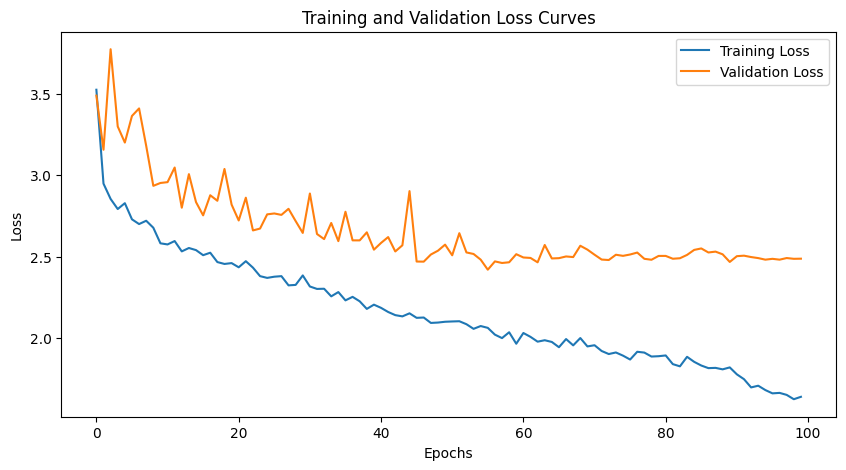

In [8]:

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 设定结果目录
results_dir = '/content/runs/detect/yolov8-tomato'  # 更新为你的结果目录
results_file = os.path.join(results_dir, 'results.csv')  # 训练日志文件
results_df = pd.read_csv(results_file)
print(results_df.columns.tolist())
train_loss = results_df['         train/box_loss']
val_loss = results_df['           val/box_loss']

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [9]:
from google.colab import files

# 下载权重文件
files.download('/content/runs/detect/yolov8-tomato/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

def check_labels(directory, num_classes):
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        return

    txt_files = [f for f in os.listdir(directory) if f.endswith('.txt')]
    if not txt_files:
        print(f"No label files found in directory: {directory}")
        return

    for filename in txt_files:
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 5:
                    print(f"Invalid label line in {file_path}: {line}")
                    continue
                try:
                    class_id = int(parts[0])
                    if class_id < 0 or class_id >= num_classes:
                        print(f"Class index out of bounds in {file_path}: {class_id}")
                except ValueError:
                    print(f"Invalid class index in {file_path}: {line}")

# 检查训练和验证标签文件
check_labels('/content/drive/MyDrive/colabhw/dataset/organized_dataset/labels/train', num_classes=1)
check_labels('/content/drive/MyDrive/colabhw/dataset/organized_dataset/labels/val', num_classes=1)

In [ ]:
import os

def normalize_coordinates(directory):
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        return

    txt_files = [f for f in os.listdir(directory) if f.endswith('.txt')]
    if not txt_files:
        print(f"No label files found in directory: {directory}")
        return

    for filename in txt_files:
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as f:
            lines = f.readlines()

        with open(file_path, 'w') as f:
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    try:
                        class_id = int(parts[0])
                        x_center = float(parts[1])
                        y_center = float(parts[2])
                        width = float(parts[3])
                        height = float(parts[4])

                        # 修正坐标值
                        x_center = min(max(x_center, 0.0), 1.0)
                        y_center = min(max(y_center, 0.0), 1.0)
                        width = min(max(width, 0.0), 1.0)
                        height = min(max(height, 0.0), 1.0)

                        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")
                    except ValueError:
                        print(f"Invalid label in {file_path}: {line}")

# 修正标签文件中的坐标
normalize_coordinates('/content/drive/MyDrive/colabhw/dataset/organized_dataset/labels/train')
normalize_coordinates('/content/drive/MyDrive/colabhw/dataset/organized_dataset/labels/val')